<a href="https://colab.research.google.com/github/shruti1610/COVID-19/blob/master/COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import MinMaxScaler
import math
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from matplotlib import style
import datetime
import matplotlib.dates
from datetime import datetime
from __future__ import division

urlc = "https://raw.githubusercontent.com/shruti1610/COVID-19/master/Datasets/Countries-Confirmed.csv"
urld= "https://raw.githubusercontent.com/shruti1610/COVID-19/master/Datasets/Countries-Deaths.csv"
urlr="https://raw.githubusercontent.com/shruti1610/COVID-19/master/Datasets/Countries-Recovered.csv"
data1 = pd.read_csv(urlc, delimiter=',')


x= data1['CNTRY_NAME'];
y=data1['0529'];

data1.head





<bound method NDFrame.head of               CNTRY_NAME  0131  0229  0331  0430   0529
0                  Aruba     0     0     0     0      0
1    Antigua and Barbuda     0     0     7    24     25
2            Afghanistan     0     1   174  2171  13659
3                Algeria     0     1   716  4006   9134
4             Azerbaijan     0     0   298  1804   4989
..                   ...   ...   ...   ...   ...    ...
246        Western Samoa     0     0     0     0      0
247            Swaziland     0     0     9   100    279
248                Yemen     0     0     0     6    283
249               Zambia     0     0    35   106   1057
250             Zimbabwe     0     0     8    40    149

[251 rows x 6 columns]>

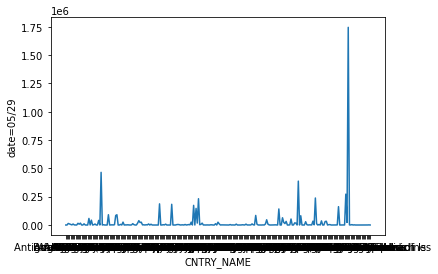

In [ ]:
plt.xlabel('CNTRY_NAME')
plt.ylabel('date=05/29')
plt.plot(x,y)

In [ ]:
data1.max(numeric_only=True)
data1.min()

CNTRY_NAME    Afghanistan
0131                    0
0229                    0
0331                    0
0430                    0
0529                    0
dtype: object

In [ ]:
data1.mean(numeric_only=True)

0131       39.549801
0229      339.864542
0331     3413.446215
0430    12969.374502
0529    23591.537849
dtype: float64

In [ ]:
data1.median(numeric_only=True)

0131      0.0
0229      0.0
0331     28.0
0430    205.0
0529    671.0
dtype: float64

In [ ]:
data= data1.loc[data1['0529'] >= 23592]


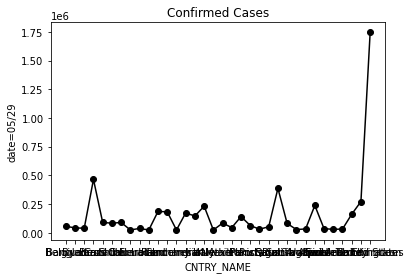

In [ ]:
x= data['CNTRY_NAME'];
y=data['0529'];
plt.title('Confirmed Cases')
plt.xlabel('CNTRY_NAME')
plt.ylabel('date=05/29')
plt.rcParams["figure.figsize"] = [25, 4.8]
plt.plot(x,y ,'-ok')

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
x = data1.iloc[:, [1,2,3,4,5]].values
kmeans = KMeans(n_clusters=2) 
kmeans.fit(x)
y_kmeans = kmeans.predict(x)
print(y_kmeans)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
kmeans.cluster_centers_

array([[3.9680000e+01, 3.4095200e+02, 2.6744120e+03, 8.7435560e+03,
        1.6701828e+04],
       [7.0000000e+00, 6.8000000e+01, 1.8817200e+05, 1.0694240e+06,
        1.7460190e+06]])

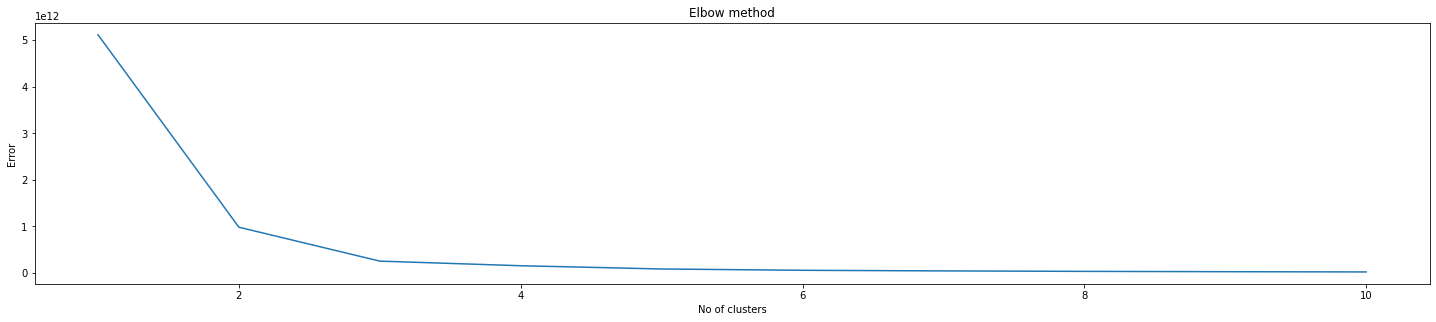

In [ ]:
Error =[]
for i in range(1, 11):
    kmeans1 = KMeans(n_clusters = i).fit(x)
    kmeans1.fit(x)
    Error.append(kmeans1.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

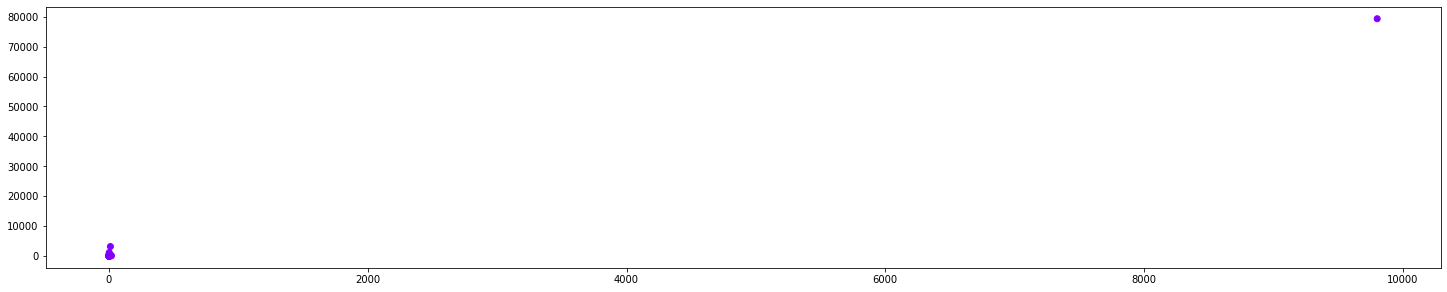

In [ ]:
plt.scatter(x[:,0], x[:,1], c=y_kmeans, cmap='rainbow')